## 🔎 Relatório 3 - Data Preparation

#### Projeto final da disciplina Aprendizagem de Máquina

Equipe:

- Kailane Felix (kefs@cin.ufpe.br)
- Sérgio Barreto (slbp@cin.ufpe.br)
- Pedro Peixinho (phagp@cin.ufpe.br)

 ### 1. Introdução

#### 1.1 Breve descrição da importância da preparação dos dados.

A preparação dos dados é uma etapa crucial na metodologia CRISP-DM (Cross-Industry Standard Process for Data Mining), sendo a terceira fase do processo. Esta etapa transforma dados brutos em um formato adequado para a modelagem, garantindo que os modelos de aprendizado de máquina possam aprender de forma eficaz e eficiente.

A qualidade dos dados é fundamental para a construção de modelos precisos e confiáveis. A preparação dos dados ajuda a identificar e corrigir problemas como valores ausentes, duplicados e inconsistências, assegurando que o dataset final seja uma representação precisa do fenômeno em estudo. Além disso, a remoção de ruídos, como outliers e valores inconsistentes, melhora a robustez e a precisão dos modelos de aprendizado de máquina.

#### 1.2 Relacionamento com as fases anteriores (Entendimento do Negócio e Entendimento dos Dados).

A preparação dos dados está intimamente ligada às fases anteriores de Entendimento do Negócio e Entendimento dos Dados. No Entendimento do Negócio, identificamos os objetivos e requisitos do projeto, o que guia a seleção e a transformação dos dados mais relevantes. No Entendimento dos Dados, exploramos e analisamos os dados brutos, identificando problemas como valores ausentes e inconsistências. Esse conhecimento é fundamental para a preparação dos dados, pois orienta as decisões sobre limpeza, normalização e seleção de características, garantindo que os dados estejam prontos para a modelagem de forma que atendam aos objetivos do negócio.

 ### 2. Revisão das Propostas de Alterações

#### 2.1 Resumo das principais propostas de alterações nos dados conforme identificadas no relatório de Entendimento dos Dados e justificativas para cada proposta

Durante a fase de Entendimento dos Dados, identificamos várias alterações necessárias para preparar os dados para a modelagem, com justificativas para cada uma delas.

1. Tratamento de Outliers

  Verificamos que os outliers não possuem uma significância considerável no volume total do dataset. Portanto, sugerimos a remoção dessas instâncias na próxima fase. A remoção dos outliers ajudará a garantir que o modelo não seja influenciado por valores extremos que não são representativos da distribuição geral dos dados, melhorando a robustez e a precisão do modelo.

2. Tratamento de Valores Ausentes

  Constatamos que nosso dataset não possui valores ausentes. Isso é positivo, pois elimina a necessidade de aplicar métodos de imputação para preencher valores faltantes. Podemos prosseguir com as análises e treinamentos de modelos sem a preocupação de lidar com dados incompletos, o que simplifica o processo de preparação dos dados.

3. Remoção de Colunas Constantes

  Observamos que algumas colunas possuem valores constantes, sem variação entre os registros. Essas colunas não fornecem informações úteis para o modelo e podem introduzir ruído desnecessário. Portanto, iremos remover essas colunas para melhorar a eficiência e a precisão do modelo, garantindo que apenas características relevantes sejam utilizadas.

4. Remoção de Linhas Duplicadas

  Identificamos a presença de linhas duplicadas no dataset. As linhas duplicadas podem distorcer a análise e o treinamento do modelo, levando a resultados menos precisos. Como parte do processo de limpeza dos dados, iremos remover essas linhas duplicadas para assegurar que cada instância no dataset seja única e contribua de forma significativa para o treinamento do modelo.

5. Normalização dos Dados

  Dado que todas as colunas preditoras são numéricas e apresentam grande variabilidade nos valores, é essencial normalizar os dados. A normalização ajudará a garantir que os modelos de aprendizado de máquina, especialmente aqueles que não são robustos a dados não normalizados, funcionem de maneira eficaz e eficiente. Os métodos de normalização a serem testados incluem Min-Max Scaling e Standard Scaling. A aplicação e comparação desses métodos nos permitirão determinar qual deles melhora mais o desempenho dos modelos.

6. Balanceamento da Variável Alvo

  Observamos um desbalanceamento na variável alvo, com a resposta positiva representando 66% da base e a resposta negativa apenas 33%. Esse desbalanceamento pode causar problemas durante o treinamento, dificultando o reconhecimento adequado das instâncias negativas. Para mitigar esse problema, iremos testar métodos de balanceamento como SMOTE (Synthetic Minority Over-sampling Technique) para oversampling.

7. Seleção de Features

  Assim como identificamos que as colunas constantes podem não acrescentar ganho de informação ao modelo e sim ruídos, podemos verificar se outras colunas aparentemente corretas também estão fazendo isso, sendo assim testaremos algoritmos de seleção de características como random forest e teste KS.

Essas propostas visam garantir que os dados estejam em um formato ideal para a modelagem, melhorando a qualidade, eficiência e precisão dos modelos de aprendizado de máquina que serão desenvolvidos.

 ### 3. Implementação das Alterações

Detalhamento das ações implementadas (ex.: remoção de outliers, imputação de valores ausentes, transformação de variáveis, etc.) e código-fonte utilizado para implementar cada ação.

#### 3.1 Tratamento de Outliers

In [ ]:
def remover_outliers_zscore(df, threshold=3):
    df_clean = df.copy()
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        z_scores = stats.zscore(df[col])
        abs_z_scores = abs(z_scores)
        mask = abs_z_scores > threshold
        df_clean = df_clean[~mask]
    return df_clean

#### 3.2 Remoção de Colunas Constantes

In [ ]:
def remover_colunas_constantes(df):
    nunique = df.apply(pd.Series.nunique)
    cols_to_drop = nunique[nunique == 1].index
    return df.drop(cols_to_drop, axis=1), cols_to_drop

#### 3.3 Remoção de Linhas Duplicadas

In [ ]:
train_df = train_df.drop_duplicates()

#### 3.4 Normalização dos Dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Ajustar o scaler no conjunto de treino e transformar as características de treino
scaler.fit(train_features)
train_features_scaled = scaler.transform(train_features)

# Criar o DataFrame com as características escaladas e adicionar a coluna do alvo
train_df_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
train_df_scaled['binaryClass'] = train_target.values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_features)
train_features_scaled = scaler.transform(train_features)

# Criar o DataFrame com as características escaladas e adicionar a coluna do alvo
train_df_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
train_df_scaled['binaryClass'] = train_target.values

Nessa etapa consideramos que ambas as abordagens de normalização devem ser testadas justamente por oferecer maior vantagens a determinados modelos, então teremos versões do dataset com cada processamento possível e então testar como input para os modelos sugeridos.

#### 3.5 Balanceamento da Variável Alvo

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

train_features_balanced, train_target_balanced = smote.fit_resample(train_df_scaled.drop(columns=['binaryClass']), train_df_scaled['binaryClass'])
train_df_balanced = pd.DataFrame(train_features_balanced, columns=train_df_scaled.drop(columns=['binaryClass']).columns)
train_df_balanced['binaryClass'] = train_target_balanced.values

#### 3.6 Seleção de Features

Além da seleção de features, testaremos utilizar PCA para reduzir a dimensionalidade:

In [ ]:
from sklearn.decomposition import PCA

model_pca = PCA(n_components=0.9, random_state = 42)
model_pca.fit(X_train)
X_train_pca = model_pca.transform(X_train)
print(X_train_pca.shape)

(6626, 10)


Usando Random Forest para a seleção de melhores features

In [ ]:
# Preparando os dados
X = cleaned_train_df_balanced.drop('binaryClass', axis=1)
y = cleaned_train_df_balanced['binaryClass']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Avaliando o modelo
y_pred = rf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Seleção de features com base na importância calculada pelo modelo
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Imprimindo a importância das features
for i in range(X.shape[1]):
    print(f'{X.columns[indices[i]]}: {importances[indices[i]]}')

Accuracy
- **Accuracy**: 0.9808853118712274

Feature Importances (Random Forest)
- **f5**: 0.4534984347874396
- **f6**: 0.17323333953394482
- **f14**: 0.05551403089848236
- **f19**: 0.04786024146190098
- **f15**: 0.045628787641383416
- **f16**: 0.03574106888734497
- **f18**: 0.02919663231009047
- **f17**: 0.027545886097751077
- **f20**: 0.024497310707071847
- **f21**: 0.022524746307747614
- **f13**: 0.02219142776639186
- **f22**: 0.014590912101562365
- **f7**: 0.01443086497480781
- **f23**: 0.009527476077979217
- **f8**: 0.005198130926461118
- **f9**: 0.0037989785698015425
- **f24**: 0.0028984313751618616
- **f32**: 0.0027234998391534545
- **f31**: 0.0016899098384756468
- **f25**: 0.001452112017960281
- **f26**: 0.0013732573345773625
- **f27**: 0.0012050304372312765
- **f30**: 0.0010163810019582953
- **f29**: 0.0009288683017028042
- **f28**: 0.0009092938346767674
- **f33**: 0.0008249469689412288

Usando KS para a seleção de melhores features

In [ ]:
df = cleaned_train_df_balanced
target = 'binaryClass'

# Calculando o teste KS para cada feature
ks_results = {}
for column in df.drop(target, axis=1).columns:
    class_0 = df[df[target] == 'P'][column]
    class_1 = df[df[target] == 'N'][column]
    ks_stat, p_value = ks_2samp(class_0, class_1)
    ks_results[column] = {'KS Statistic': ks_stat, 'P-Value': p_value}

# Convertendo resultados em DataFrame para melhor visualização
ks_results_df = pd.DataFrame(ks_results).T

# Exibindo os resultados
print(ks_results_df)

# Ordenando os resultados pelo P-Value
ks_results_df = ks_results_df.sort_values(by='P-Value')

# Exibindo as features mais discriminativas
print(ks_results_df.head(10))

Resultados do Teste KS

| Feature | KS Statistic | P-Value         |
|---------|--------------|-----------------|
| f5      | 0.587987     | 0.000000e+00    |
| f6      | 0.352852     | 1.880884e-183   |
| f7      | 0.046182     | 1.705153e-03    |
| f8      | 0.089345     | 6.339225e-12    |
| f9      | 0.038636     | 1.422571e-02    |
| f13     | 0.067009     | 6.864731e-07    |
| f14     | 0.124660     | 7.702110e-23    |
| f15     | 0.109267     | 1.233098e-17    |
| f16     | 0.081799     | 4.618387e-10    |
| f17     | 0.061877     | 6.157007e-06    |
| f18     | 0.116209     | 6.752972e-20    |
| f19     | 0.185331     | 4.000444e-50    |
| f20     | 0.118322     | 1.298138e-20    |
| f21     | 0.107154     | 5.641756e-17    |
| f22     | 0.069725     | 2.001813e-07    |
| f23     | 0.031090     | 8.133443e-02    |
| f24     | 0.016903     | 7.312580e-01    |
| f25     | 0.029279     | 1.168280e-01    |
| f26     | 0.035014     | 3.443608e-02    |
| f27     | 0.027166     | 1.733662e-01    |
| f28     | 0.027468     | 1.641640e-01    |
| f29     | 0.027468     | 1.641640e-01    |
| f30     | 0.021431     | 4.322409e-01    |
| f31     | 0.024751     | 2.622125e-01    |
| f32     | 0.014488     | 8.777198e-01    |
| f33     | 0.007546     | 9.999831e-01    |

Principais Features (KS Statistic > 0.05)

| Feature | KS Statistic | P-Value         |
|---------|--------------|-----------------|
| f5      | 0.587987     | 0.000000e+00    |
| f6      | 0.352852     | 1.880884e-183   |
| f19     | 0.185331     | 4.000444e-50    |
| f14     | 0.124660     | 7.702110e-23    |
| f20     | 0.118322     | 1.298138e-20    |
| f18     | 0.116209     | 6.752972e-20    |
| f15     | 0.109267     | 1.233098e-17    |
| f21     | 0.107154     | 5.641756e-17    |
| f8      | 0.089345     | 6.339225e-12    |
| f16     | 0.081799     | 4.618387e-10    |


Usando KBest para a seleção de melhores features

In [ ]:
df = cleaned_train_df_balanced
target = 'binaryClass'

# Separando as features (X) e o alvo (y)
X = df.drop(target, axis=1)
y = df[target]

# Selecionando as 10 melhores features
k = 20
kbest = SelectKBest(score_func=f_classif, k=k)
X_new = kbest.fit_transform(X, y)

# Obtendo os nomes das melhores features
mask = kbest.get_support()  # Máscara das features selecionadas
best_features = X.columns[mask]

print(f"As {k} melhores features são:")
print(best_features)

As 20 melhores features selecionadas são:

- f5
- f6
- f7
- f8
- f13
- f14
- f15
- f16
- f17
- f18
- f19
- f20
- f21
- f22
- f23
- f26
- f27
- f28
- f29
- f30


#### 3.7 Visualizações e tabelas que ilustrem o antes e depois das alterações.

In [ ]:
# Obter todas as colunas numéricas
colunas_numericas = cleaned_df.select_dtypes(include=['number']).columns

# Criar subplots para cada coluna numérica
fig, axs = plt.subplots(len(colunas_numericas), 4, figsize=(20, len(colunas_numericas) * 5))

for i, coluna in enumerate(colunas_numericas):
    # Distribuição dos dados originais
    sns.histplot(original_df[coluna], kde=True, ax=axs[i, 0])
    axs[i, 0].set_title(f'Distribuição dos Dados Originais - {coluna}')

    # Distribuição dos dados limpos
    sns.histplot(cleaned_df[coluna], kde=True, ax=axs[i, 1])
    axs[i, 1].set_title(f'Distribuição dos Dados Limpos - {coluna}')

    # Boxplot dos dados originais
    sns.boxplot(x=original_df[coluna], ax=axs[i, 2])
    axs[i, 2].set_title(f'Boxplot dos Dados Originais - {coluna}')

    # Boxplot dos dados limpos
    sns.boxplot(x=cleaned_df[coluna], ax=axs[i, 3])
    axs[i, 3].set_title(f'Boxplot dos Dados Limpos - {coluna}')

plt.tight_layout()
plt.show()

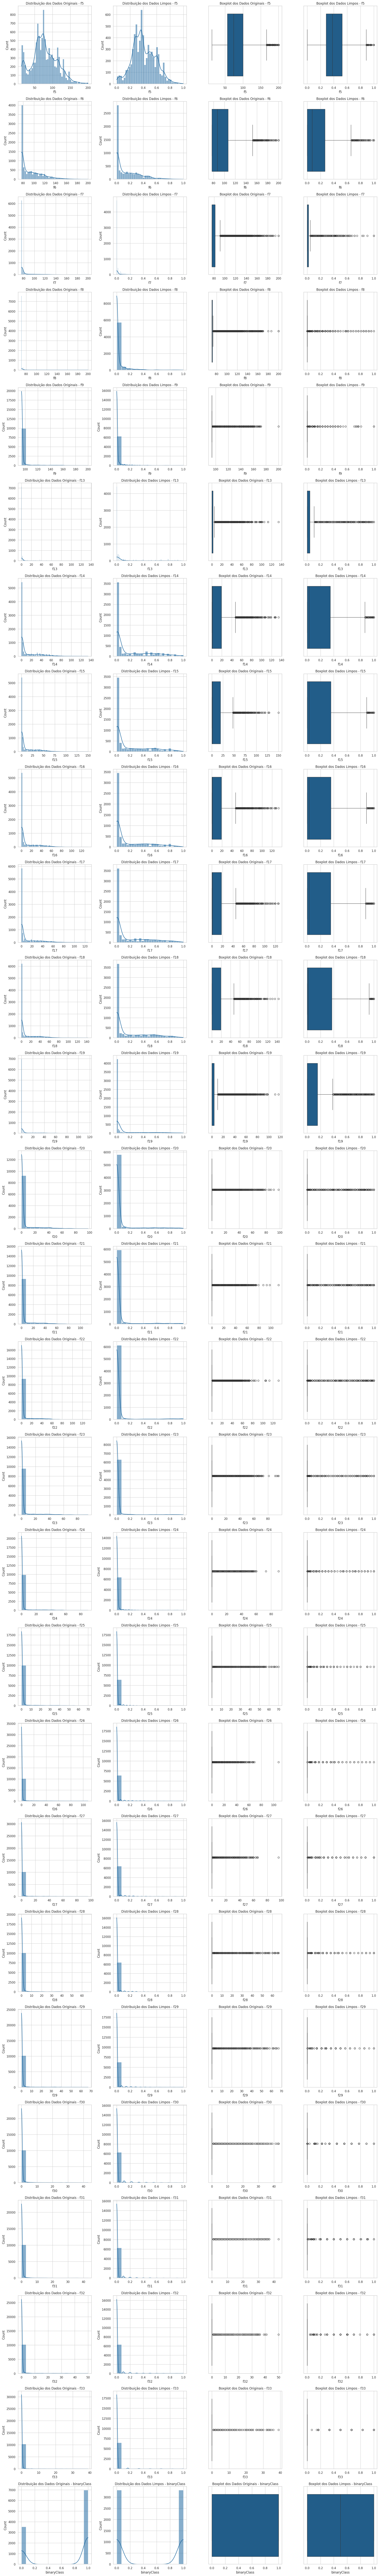

Comparação da proporção de positivo e negativo da variável alvo

Antes

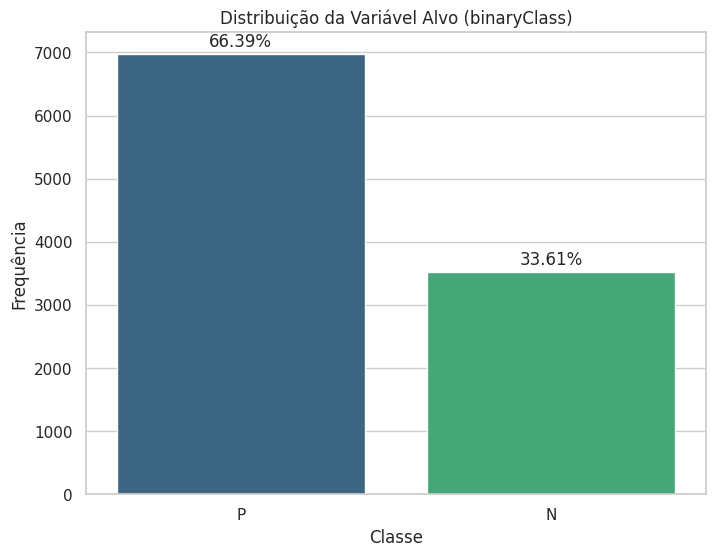

Depois

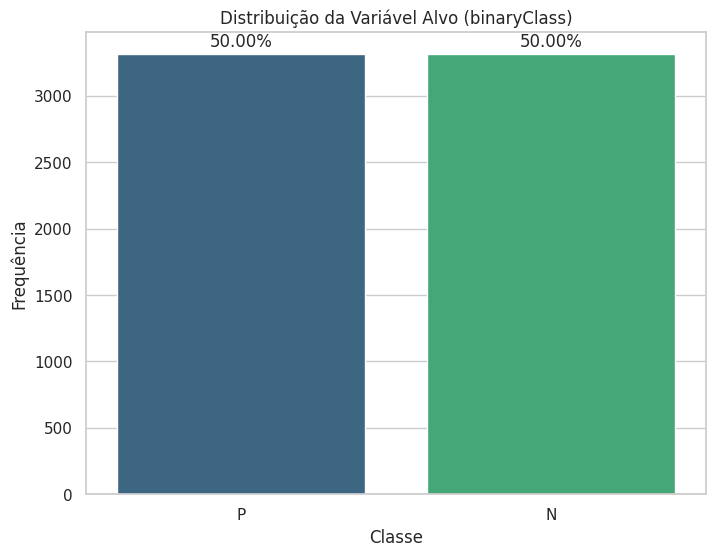

 ### 4. Resultados da Preparação dos Dados


#### 4.1 Estatísticas descritivas dos dados após as alterações.

In [ ]:
import pandas as pd
from IPython.display import HTML, display

html_table = cleaned_df.describe().to_html(float_format="%.2f", classes="table table-striped")
display(HTML(html_table))

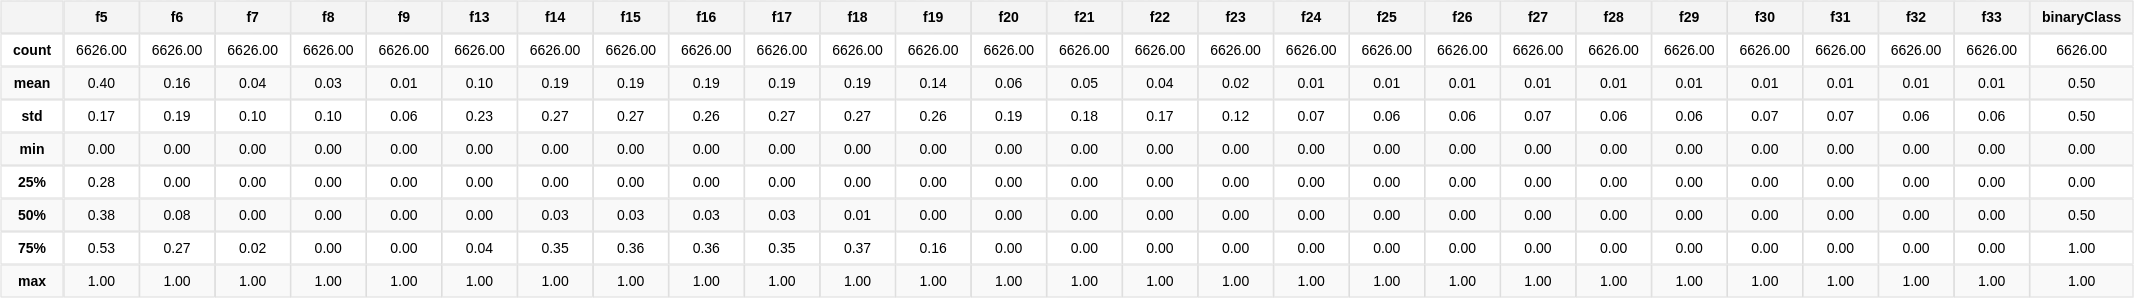

#### 4.2 Comparação entre os dados antes e depois da preparação.

In [ ]:
import pandas as pd
from IPython.display import HTML

before_after_comparison = pd.concat([original_df.describe().T, cleaned_df.describe().T], axis=1, keys=['Antes', 'Depois'])
html_table = before_after_comparison.to_html(float_format="%.2f", classes="table table-striped")
display(HTML(html_table))

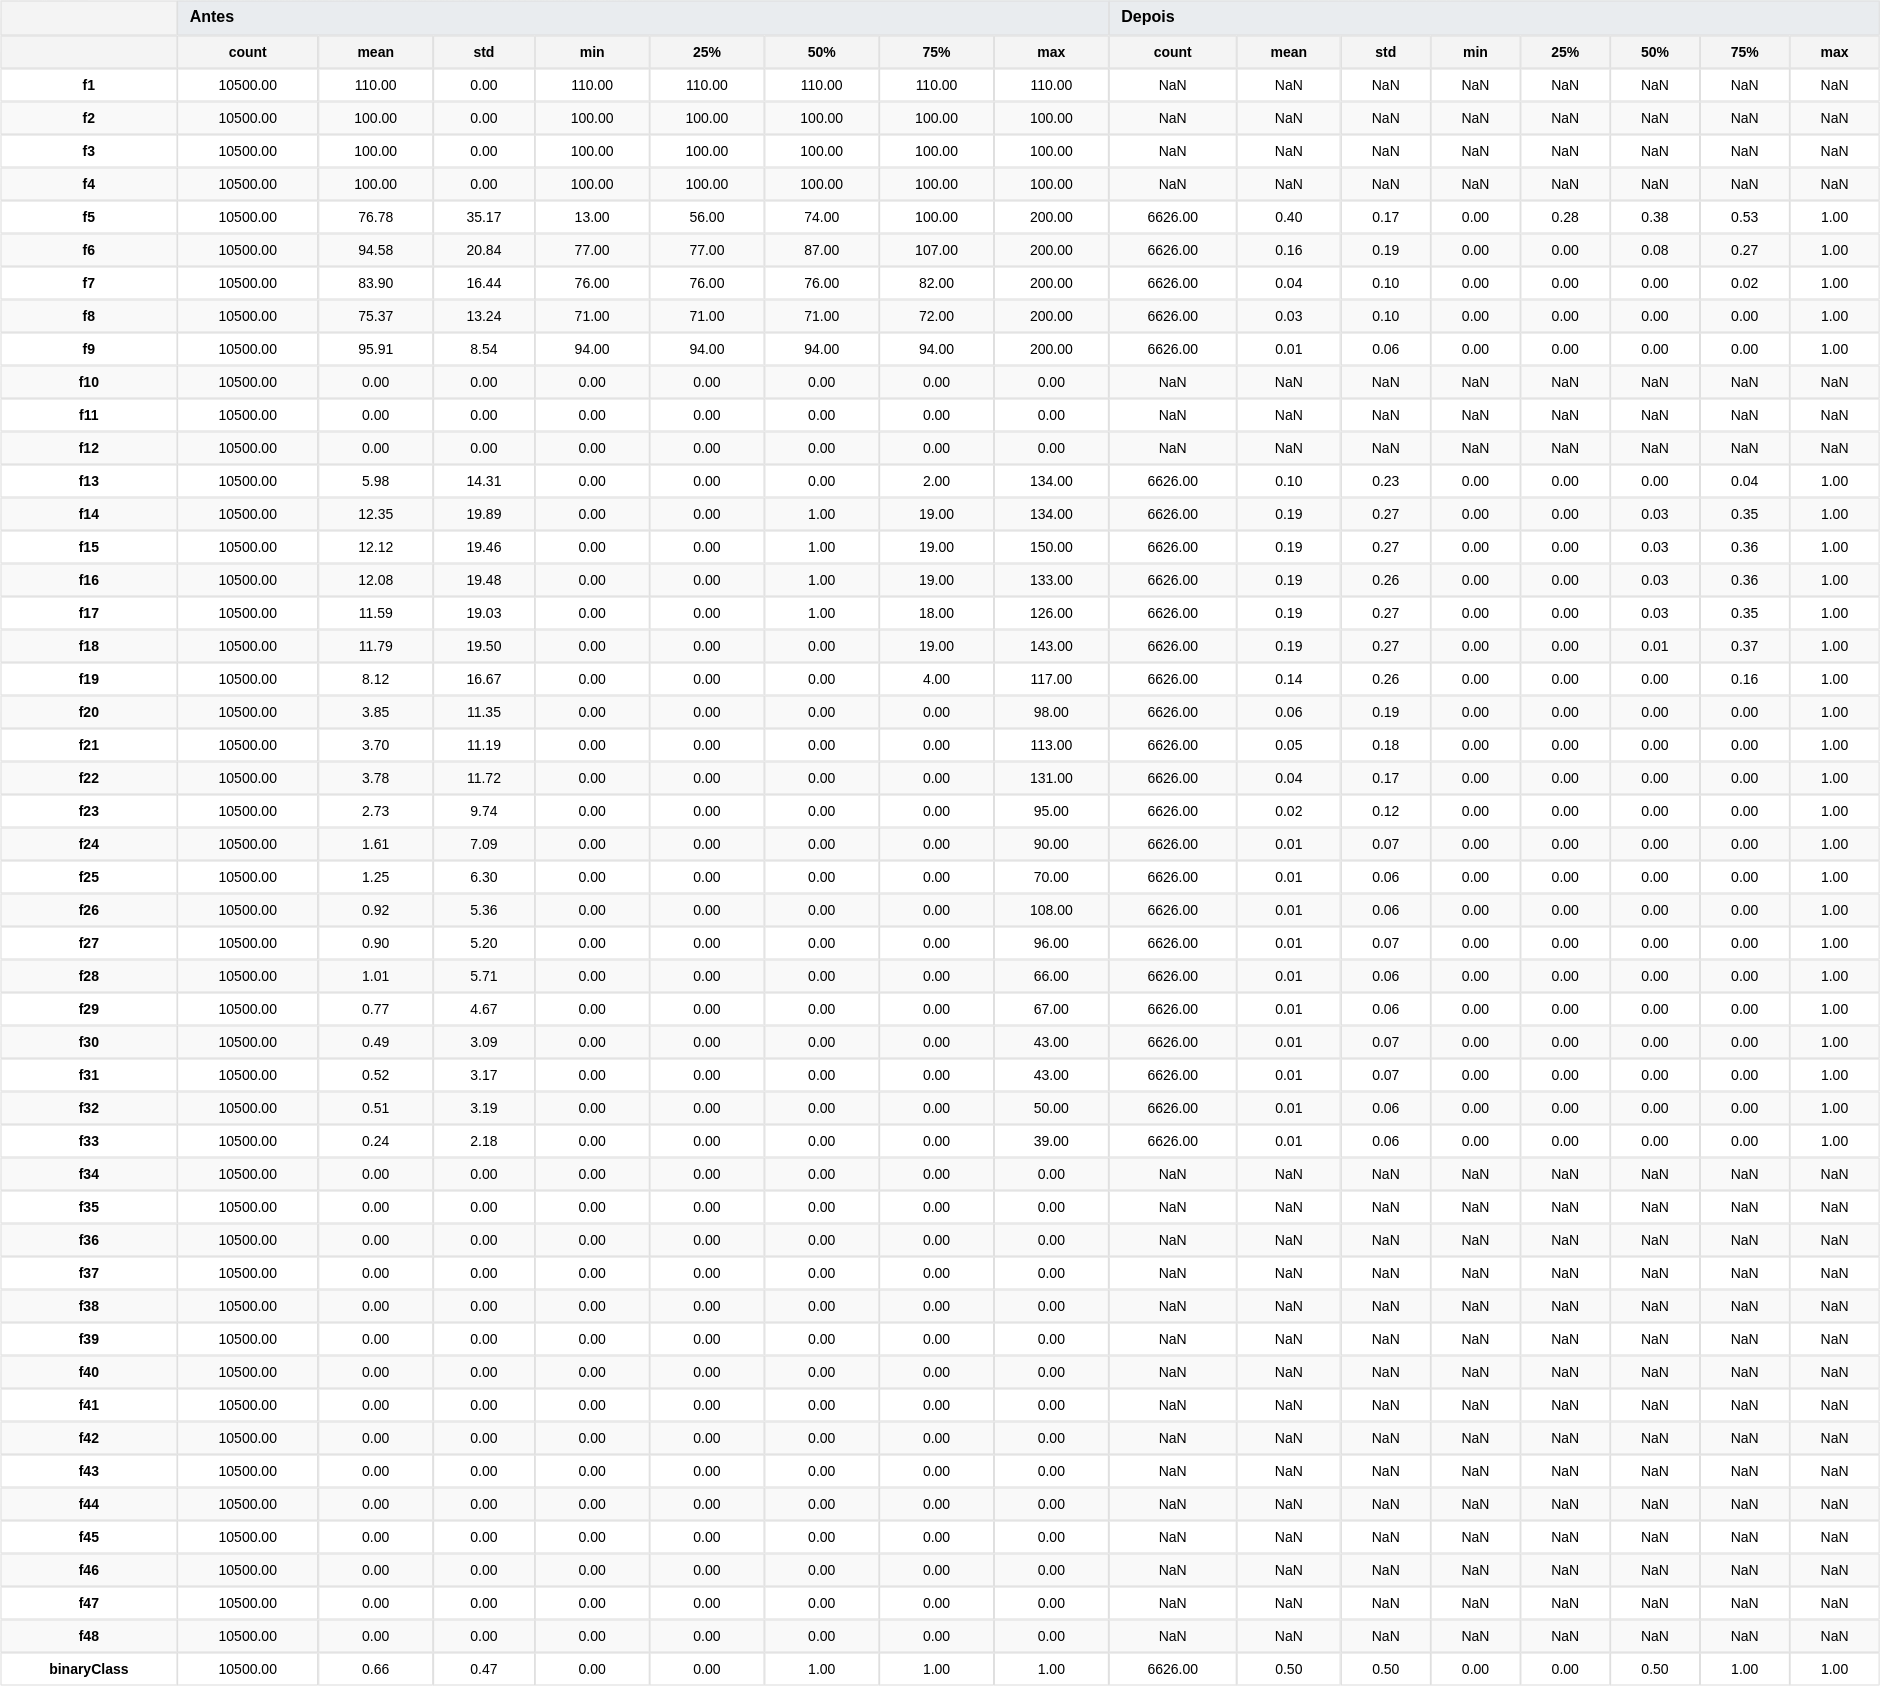

As colunas que possuírem todos os valores igual a NaN é porque foram removidas após a limpeza por sua variablidade baixa.

#### 4.3 Discussão sobre a qualidade dos dados preparados (completude, consistência, integridade).

Em relação a completude, no nosso caso, o dataset original não apresentava valores nulos. A ausência de valores nulos significa que não precisamos enfrentar problemas de dados faltantes, evitando a necessidade de métodos de imputação ou exclusão de linhas/colunas. Isso assegura que a completude dos dados foi mantida ao longo do processo.

Identificamos e removemos os outliers, cuja presença pode indicar erros de medição ou condições excepcionais que não refletem o padrão geral. Ao eliminar esses outliers, aprimoramos a consistência dos dados, tornando os padrões mais evidentes e os modelos mais robustos.

Além disso, balanceamos a variável alvo para evitar que o modelo de aprendizado de máquina fosse influenciado pelas classes majoritárias. Esse ajuste ajuda a garantir que o modelo tenha um desempenho mais equitativo em relação às diferentes classes, resultando em uma avaliação mais justa e representativa.

Aplicamos também a normalização dos dados para assegurar que todas as variáveis sejam comparáveis em uma mesma escala. Essa etapa é especialmente importante para algoritmos que dependem de medidas de distância, como K-means ou SVMs, e contribui para melhorar a convergência e o desempenho do modelo.

### 5. Conjunto de Treinamento e Validação

#### 5.1 Descrição da divisão dos dados em subconjuntos de treinamento, validação e teste

Os dados foram divididos em três subconjuntos principais: treinamento, validação e teste. Inicialmente, o DataFrame foi separado em um subconjunto de treinamento (70% dos dados) e um subconjunto temporário (30% dos dados). Em seguida, o subconjunto temporário foi subdividido em partes iguais para formar os conjuntos de teste e validação, cada um com 15% dos dados originais.

A divisão foi realizada utilizando a estratégia de estratificação com base na variável alvo binaryClass para garantir que a distribuição das classes fosse mantida em cada subconjunto. Essa abordagem assegura que o modelo seja treinado e avaliado de maneira robusta e representativa.

In [ ]:
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['binaryClass'])
test_df, val_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['binaryClass'])

#### 5.2 Explicação sobre a não modificação do conjunto de teste durante a preparação dos dados.

Durante a preparação dos dados, é crucial não modificar o conjunto de teste para garantir que a avaliação do modelo seja justa e representativa do seu desempenho em dados inéditos. O conjunto de teste serve como uma amostra independente que simula a aplicação real do modelo em dados que ele nunca viu antes. Qualquer alteração feita nesse conjunto pode introduzir viés e afetar a validade das métricas de avaliação.

Manter o conjunto de teste intacto permite que a performance do modelo seja avaliada com precisão e que a generalização do modelo para novos dados seja verificada de maneira confiável. Alterações ou transformações aplicadas ao conjunto de teste podem levar a uma superestimação ou subestimação da capacidade do modelo de lidar com dados reais, comprometendo a credibilidade dos resultados.

Portanto, todas as etapas de preparação, como normalização, balanceamento e limpeza de dados, devem ser realizadas apenas nos conjuntos de treino e validação, garantindo que o conjunto de teste permaneça uma representação fiel das condições reais de aplicação do modelo.

#### 5.3 Verificação da integridade e representatividade dos conjuntos de treinamento e validação após a preparação.

 ### 6. Reflexões Críticas

#### 6.1 Discussão sobre a eficácia das ações de preparação

As ações de preparação realizadas foram eficazes em limpar e estruturar o conjunto de dados para modelagem. A remoção de outliers utilizando Z-score garantiu que valores extremos não influenciassem indevidamente os resultados do modelo. A eliminação de colunas constantes e duplicadas ajudou a reduzir o ruído e a redundância, melhorando a qualidade do conjunto de dados. A normalização foi aplicada para garantir que todas as características fossem comparáveis, o que é crucial para modelos sensíveis à escala dos dados. O uso do SMOTE foi eficaz em balancear a distribuição das classes, melhorando a capacidade do modelo de identificar a classe minoritária.

#### 6.2 Identificação de quaisquer problemas ou desafios enfrentados durante a preparação

Durante o processo de preparação, um desafio significativo foi a remoção de outliers, que inicialmente levou à exclusão excessiva de dados, resultando em perda de informações importantes. Outro problema encontrado foi a necessidade de garantir que as transformações fossem aplicadas de forma consistente entre os conjuntos de treino, teste e validação para evitar viés. A remoção de colunas constantes e duplicadas revelou a necessidade de ajustar as estratégias para não eliminar informações relevantes. A aplicação do SMOTE também exigiu um ajuste cuidadoso para evitar a geração excessiva de exemplos sintéticos que poderiam levar a overfitting.

#### 6.3 Reflexões sobre possíveis melhorias futuras

Para melhorias futuras, seria benéfico explorar métodos alternativos de detecção de outliers e balanceamento que possam ser menos suscetíveis a perda de dados. A implementação de técnicas de validação cruzada pode ajudar a garantir que o modelo generalize bem para dados não vistos. Além disso, poderia-se considerar a integração de técnicas de redução de dimensionalidade para melhorar a eficiência computacional e a interpretabilidade do modelo. Revisar e ajustar os parâmetros de normalização e balanceamento pode também otimizar ainda mais a preparação dos dados e a performance dos modelos.

 ### 7. Conclusão

#### 7.1 Resumir os pontos chave do relatório e delinear os próximos passos.

Pontos Chave do Relatório:

1. Importância da Preparação dos Dados:

  - A preparação dos dados é crucial para garantir a qualidade e precisão dos modelos de aprendizado de máquina.
  - Transformação de dados brutos em um formato adequado para a modelagem.

2. Propostas de Alterações nos Dados que foram implementadas:

  - Tratamento de Outliers: Remoção de outliers para melhorar a robustez e precisão do modelo.
  - Tratamento de Valores Ausentes: Dataset não possui valores ausentes, eliminando a necessidade de imputação.
  - Remoção de Colunas Constantes: Colunas sem variação foram removidas para melhorar a eficiência e precisão do modelo.
  - Remoção de Linhas Duplicadas: Linhas duplicadas foram removidas para assegurar que cada instância seja única.
  - Normalização dos Dados: Aplicação de Min-Max Scaling e Standard Scaling para garantir a eficácia dos modelos.
  - Balanceamento da Variável Alvo: Uso do SMOTE para lidar com o desbalanceamento da variável alvo.
  - Seleção de Features: Teste de algoritmos como Random Forest, PCA e teste KS para selecionar as melhores características.

Próximos Passos:

- Avaliação dos Modelos: Treinamento e avaliação dos modelos de aprendizado de máquina utilizando os dados preparados.

- Comparação dos resultados dos modelos com diferentes abordagens de normalização e seleção de features.

- Ajuste e Otimização: Ajuste dos hiperparâmetros dos modelos para melhorar a performance. Teste de técnicas avançadas de balanceamento e normalização, se necessário.

- Documentação e Apresentação: Documentação detalhada dos procedimentos e resultados obtidos. Preparação de uma apresentação clara e concisa dos resultados.

#### 7.2 Resumo das principais ações implementadas e seus resultados.

As ações implementadas estão descritas resumidamente na seção 2.1 e 7.1, e seus resultados estão demonstrados na seção 4.

#### 7.3 Próximos passos na fase de Modelagem.

Na fase de modelagem, os próximos passos envolvem a aplicação e avaliação de diversos algoritmos de aprendizado de máquina para determinar quais modelos oferecem o melhor desempenho com o conjunto de dados preparado.

Modelos a serem testados:

- K-NN (K-Nearest Neighbors)
- LVQ (Learning Vector Quantization)
- Árvore de Decisão
- SVM (Support Vector Machine)
- Rede Neural MLP (Multi-Layer Perceptron)
- Comitê de Redes Neurais Artificiais
- Comitê Heterogêneo

Cada modelo será treinado usando o conjunto de treino balanceado e normalizado. Para avaliar o desempenho dos modelos, utilizaremos métricas de avaliação como precisão, recall, F1-score e a curva ROC-AUC. Adicionalmente, a validação cruzada será aplicada para garantir que os resultados sejam robustos e generalizáveis.

O ajuste de hiperparâmetros será uma etapa crucial para otimizar a performance de cada modelo. Usaremos técnicas como busca em grade (Grid Search) e busca aleatória (Random Search) para encontrar as melhores configurações. Após a otimização, o modelo final será selecionado com base em seu desempenho geral e será testado no conjunto de validação para avaliar sua eficácia em dados não vistos.

#### 7.4 Reflexão sobre a importância da preparação adequada dos dados para o sucesso do projeto.

A preparação adequada dos dados é crucial para o sucesso de projetos de aprendizado de máquina, pois afeta diretamente a precisão e eficácia dos modelos. A limpeza, normalização e balanceamento dos dados garantem que os modelos sejam treinados com informações relevantes e livres de viés, melhorando a performance e a confiabilidade das previsões. A normalização assegura a consistência entre variáveis, enquanto o balanceamento evita o viés em relação a classes majoritárias. A remoção de colunas constantes e duplicadas reduz o ruído e melhora a eficiência do modelo. Em essência, uma boa preparação de dados é essencial para obter modelos precisos, interpretáveis e úteis para a tomada de decisões.

 ### 8. Anexos

#### 8.1 Código-fonte completo utilizado na preparação dos dados.

O código fonte está disponível em: https://colab.research.google.com/drive/1fkvCJmVSS1IlZOHu9j0XJtnKd6gpjKVl?usp=sharing